In [23]:
import numpy as np
import pandas as pd
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

from objects import file_path_ratings as ratings

In [24]:
df = pd.read_csv(ratings)
ratings_matrix = df.pivot(index='userId', columns='movieId', values='rating')
ratings_matrix.shape

(610, 9724)

In [25]:
ratings_matrix = ratings_matrix.dropna(thresh=200, axis=0)
ratings_matrix = ratings_matrix.dropna(thresh=90, axis=1)
ratings_matrix.shape

(134, 23)

In [26]:
ratings_matrix_filled = ratings_matrix.fillna(2.5)
ratings_array = ratings_matrix_filled.values  # transform into np.array
user_ratings_mean = np.mean(ratings_array, axis=1)
ratings_array_demeaned = ratings_array - user_ratings_mean.reshape(-1, 1)

In [27]:
u, sigma, vt = svds(ratings_array_demeaned, k=3) # where k is some latent feature, k is used to reduce dimensionality and computations

In [28]:
print((f"Matrix U:\n", u))
u.shape

('Matrix U:\n', array([[-0.07929906, -0.08846686,  0.04643066],
       [-0.08024469, -0.06448968,  0.04612266],
       [ 0.17526646,  0.04748009, -0.03412667],
       [-0.0118056 , -0.00460939,  0.05062444],
       [-0.10198388, -0.054064  ,  0.05247545],
       [-0.07143422,  0.03758198, -0.01123065],
       [ 0.13533147, -0.2229471 , -0.03050778],
       [-0.07220342, -0.01128235,  0.04488329],
       [-0.04670882,  0.0953034 ,  0.06584231],
       [ 0.06888399, -0.06015489,  0.10946165],
       [-0.19527464, -0.01598171,  0.06535723],
       [ 0.05762231,  0.02304814,  0.04952773],
       [-0.10008306, -0.08594536, -0.00604216],
       [-0.0866912 , -0.05957719, -0.00675476],
       [-0.02731559, -0.01670579,  0.09029002],
       [ 0.0271892 , -0.08820067,  0.15171735],
       [ 0.04092573,  0.05692501,  0.07686367],
       [-0.03340779,  0.14042878,  0.10320715],
       [-0.14396092, -0.11642978,  0.0006136 ],
       [-0.03668417,  0.06220688,  0.00249978],
       [-0.0379473 , -0.

(134, 3)

In [29]:
print(f"Matrix V:\n", vt.T)
vt.shape

Matrix V:
 [[ 0.2008885  -0.04341405 -0.10492478]
 [-0.16586881 -0.44420704  0.14336327]
 [ 0.05876658  0.10546453  0.36910095]
 [ 0.51118772  0.17923098  0.24891032]
 [ 0.38628851  0.01776183  0.12618934]
 [ 0.04356422 -0.02499853 -0.2274465 ]
 [-0.15291014 -0.10474017 -0.06890595]
 [ 0.00429754  0.17065776  0.12140548]
 [ 0.11056749  0.10682701 -0.4332501 ]
 [-0.12263309 -0.41454018  0.16042126]
 [-0.02260226 -0.23264522  0.0187348 ]
 [-0.10963814 -0.38817031  0.04927679]
 [ 0.18312936  0.02043614  0.03485636]
 [ 0.30360312 -0.19730754 -0.01686429]
 [ 0.09312027 -0.01819575 -0.29970202]
 [-0.18805048  0.07718966 -0.05077767]
 [-0.206808    0.02631928  0.15907912]
 [ 0.08525052  0.04556327 -0.44660896]
 [-0.23380688  0.19707292 -0.10976022]
 [-0.21761974  0.31307633  0.18539116]
 [-0.08591254  0.29799606  0.27284408]
 [-0.31204291  0.21077691 -0.16244726]
 [-0.16277086  0.09984611  0.03111481]]


(3, 23)

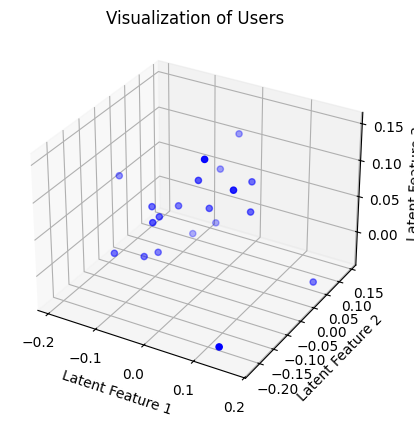

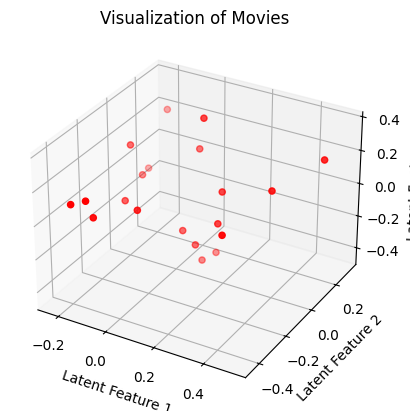

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u[:20, 0], u[:20, 1], u[:20, 2], c='blue', marker='o')
plt.title('Visualization of Users')
ax.set_xlabel('Latent Feature 1')
ax.set_ylabel('Latent Feature 2')
ax.set_zlabel('Latent Feature 3')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vt.T[:20, 0], vt.T[:20, 1], vt.T[:20, 2], c='red', marker='o')
plt.title('Visualization of Movies')
ax.set_xlabel('Latent Feature 1')
ax.set_ylabel('Latent Feature 2')
ax.set_zlabel('Latent Feature 3')
plt.show()